In [81]:
import random
import matplotlib.pyplot as plt

# Define the target hexagon as a list of six (x, y) coordinates
TARGET_HEXAGON = [(0, 1), (0.87, 0.5), (0.87, -0.5), (0, -1), (-0.87, -0.5), (-0.87, 0.5), (0, 1)]

# Define the size of the population and the number of generations
POPULATION_SIZE = 50
NUM_GENERATIONS = 1000

# Define the mutation rate (i.e., the probability that a gene will mutate)
MUTATION_RATE = 0.1

# Define the fitness function, which calculates the distance between the
# chromosome and the target hexagon
def fitness(chromosome):
    distance = 0
    for i in range(len(chromosome)):
        dx = chromosome[i][0] - TARGET_HEXAGON[i][0]
        dy = chromosome[i][1] - TARGET_HEXAGON[i][1]
        distance += dx*dx + dy*dy
    return -distance  # we negate distance because we want to maximize fitness

# Initialize the population with random chromosomes
population = []
for i in range(POPULATION_SIZE):
    chromosome = [(random.uniform(-1, 1), random.uniform(-1, 1)) for j in range(7)]
    population.append(chromosome)

# Evolve the population using a genetic algorithm
fitnesses = []
for generation in range(NUM_GENERATIONS):
    # Calculate the fitness of each chromosome in the population
    fitnesses = [fitness(chromosome) for chromosome in population]

    # Select the parents for the next generation using tournament selection
    parent_indices = []
    for i in range(POPULATION_SIZE):
        population_indices = random.sample(range(POPULATION_SIZE), 3)
        population_fitnesses = [fitnesses[j] for j in population_indices]
        winner_index = population_indices[population_fitnesses.index(max(population_fitnesses))]
        parent_indices.append(winner_index)

    # Create the next generation using crossover and mutation
    next_generation = []
    for i in range(POPULATION_SIZE // 2):
        parent1_index = parent_indices[random.randint(0, POPULATION_SIZE - 1)]
        parent2_index = parent_indices[random.randint(0, POPULATION_SIZE - 1)]
        # crossover
        parent1 = population[parent1_index]
        parent2 = population[parent2_index]
        child1 = parent1[:3] + parent2[3:]
        child2 = parent2[:3] + parent1[3:]
        # Mutation
        child1 = [(x + random.uniform(-0.1, 0.1), y + random.uniform(-0.1, 0.1)) for (x, y) in child1]
        child2 = [(x + random.uniform(-0.1, 0.1), y + random.uniform(-0.1, 0.1)) for (x, y) in child2]
        next_generation.append(child1)
        next_generation.append(child2)

    # Replace the old population with the new generation
    population = next_generation

    # Print the best fitness in this generation
    best_fitness = max(fitnesses)
    # print(f"Generation {generation}: Best fitness = {best_fitness:.2f}")

    # Add the best fitness to the list of fitnesses for plotting
    fitnesses.append(best_fitness)

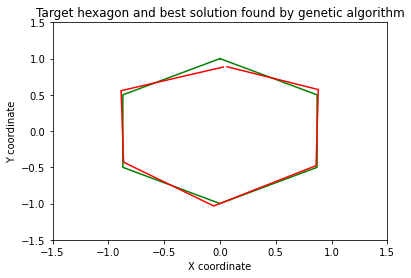

In [82]:
import matplotlib.pyplot as plt

# Plot the target hexagon
x_values = [coord[0] for coord in TARGET_HEXAGON]
y_values = [coord[1] for coord in TARGET_HEXAGON]
plt.plot(x_values, y_values, color='green')

# Plot the best chromosome found by the genetic algorithm
best_chromosome = max(population, key=fitness)
x_values = [coord[0] for coord in best_chromosome]
y_values = [coord[1] for coord in best_chromosome]
plt.plot(x_values, y_values, color='red')

# Set the limits of the plot
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add a title and labels to the axes
plt.title("Target hexagon and best solution found by genetic algorithm")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")

# Display the plot
plt.show()